# Quantum Teleportation (Simple protocol - Three Qbits )

in this protocol we have three qubits, one of them is in the Alices lab(General state) shown as |$\psi$>  



the other two are in the bell states. one of them is in the Alices lab and another one is in the Bob's Lab

Alice do measurements on General Qubit and her own entangled Qubit.
result of this measurements is two separate classical Bits.

She will send two Bits to Bob. Bob will use bit flips and phase filipes to bits and his own qubit to see a qubit in a final state. 

according to the quantum roll's final state of bob qubit is exactly the same of first state of $|\psi>$ 

an important Note: after measurements of Alice, $|\psi>$ is absaloutly destroyed and it recerate in the Bobs lab.
  
Question: when exactly General Qubit is destroyed?????

### Now we are on the same page, i think it's a good time to create a Quantum circuit for described QT protocol.

In [ ]:
# first of all, we should call required libraries.
# we are gonna using Qiskit, our codes are gonna simulate on my local machine

# First setup our circuit

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumCircuit, QuantumRegister



qregister = QuantumRegister(3, name = "qubit") # for Create three qubits q1, q2, sci
bit1, bit2 = ClassicalRegister(1, name="Bit 1"),ClassicalRegister(1, name="Bit 2")


main_circuit = QuantumCircuit(qregister, bit1, bit2)



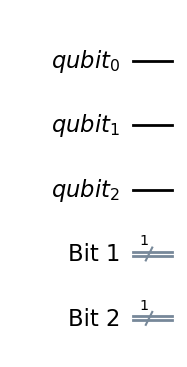

In [2]:
main_circuit.draw("mpl")

## Now create a bell state with entangling two of our qubits (qubit 1 and qubit 2)

### for entangle two qubit first we apply hadamard on on one of them(to took it into the superposition), and next we should apply a Cnot gate to both of them(why we use CNOT Gate?????????)




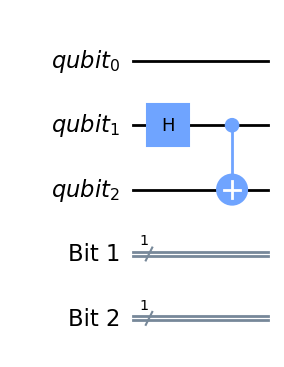

In [3]:
# entangling

main_circuit.h(1) # Applying hadamard on Qubit2
main_circuit.cx(1, 2) # Applying CNOT gate on Qubit1(as controled) and Qubit2 (as Not)
main_circuit.draw("mpl")

#### Exactly now they are entangled in Bell states

#### now we send one of these entangled qubits to Bob, on the other hand Alice will do some measurement on qubit0 and qubi1 in her lab
####

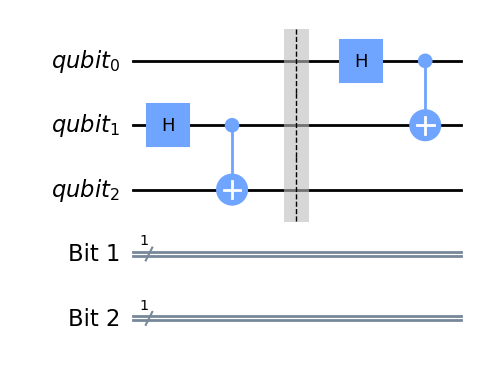

In [4]:
# first of all lets separate entangle part from alice's lab
main_circuit.barrier()

# first alice should entangle her two qubits (|sci> and |qubit1>). similar to cell in abow:

main_circuit.h(0) # Applying hadamard on Qubit0(or we could say |sci>)
main_circuit.cx(0, 1) # Applying CNOT gate on Qubit0(as controled) and Qubit1 (as Not)
main_circuit.draw("mpl")

## now she will measure her own qubits, according to the Qiskit document:



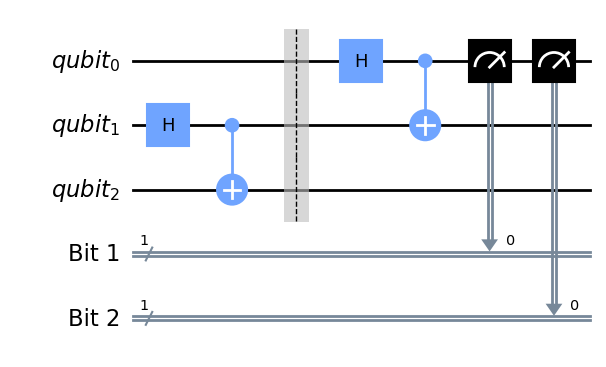

In [6]:
main_circuit.measure(0,0) # (qbit, cbit)
main_circuit.measure(0,1)
main_circuit.draw("mpl")

In [7]:
main_circuit.barrier()

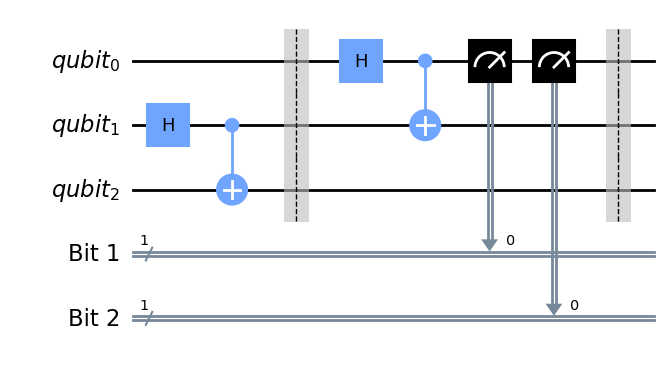

In [9]:
main_circuit.draw("mpl")

### Now alice is sending two bits to Bob And he will do some measurement:


00 = Do nothing

01 = Apply X gate

10 = Apply Z  gate

11 = Apply ZX gate

# ok but why

In [10]:
main_circuit.x(2).c_if(bit1, 1) # Apply gates if the registers 
main_circuit.z(2).c_if(bit2, 1) # are in the state '1'2

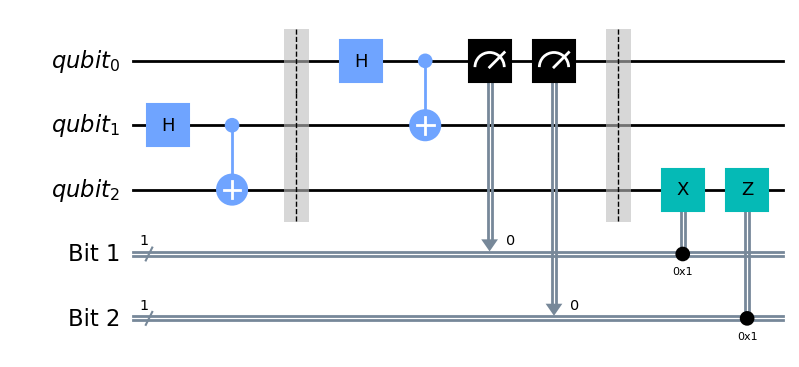

In [11]:
main_circuit.draw("mpl")